In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("stroke-data.csv")

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.duplicated().any()

False

In [7]:
df.shape

(5110, 12)

In [9]:
dff=df.dropna()

In [10]:
dff.shape

(4909, 12)

In [12]:
dff.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(4909, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [16]:
for col in df.columns:
    if df[col].dtype in ['float64']:
        df[col]=df[col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4909 non-null   int64 
 1   gender             4909 non-null   object
 2   age                4909 non-null   int64 
 3   hypertension       4909 non-null   int64 
 4   heart_disease      4909 non-null   int64 
 5   ever_married       4909 non-null   object
 6   work_type          4909 non-null   object
 7   Residence_type     4909 non-null   object
 8   avg_glucose_level  4909 non-null   int64 
 9   bmi                4909 non-null   int64 
 10  smoking_status     4909 non-null   object
 11  stroke             4909 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 498.6+ KB


In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228,36,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105,32,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186,29,formerly smoked,1


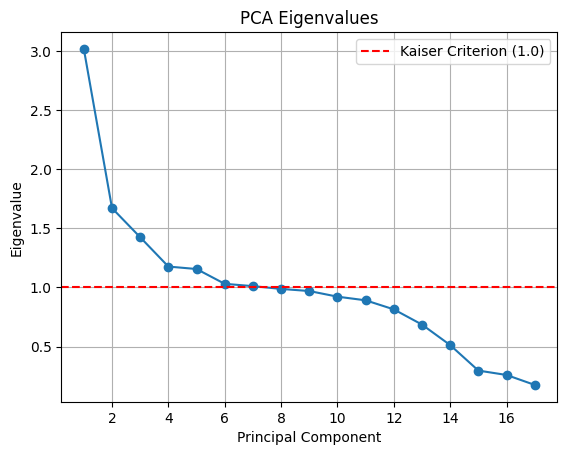

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'Smoking_Pack_Years' is the target
X = df.drop(columns=['stroke'])

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA (keep up to 30 components or all if fewer)
pca = PCA(n_components=min(30, X.shape[1]))
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance (eigenvalues)
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (1.0)')
plt.title('PCA Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Create a DataFrame to show PCA components (loadings)
component_names = [f'PC{i+1}' for i in range(pca.n_components_)]
loadings_df = pd.DataFrame(pca.components_.T, columns=component_names, index=X.columns)

# Display the loadings
print("PCA Component Loadings:")
print(loadings_df)

PCA Component Loadings:
                                     PC1       PC2       PC3       PC4  \
id                              0.014034  0.041834 -0.049033 -0.035672   
age                             0.496224 -0.133507  0.028311  0.012233   
hypertension                    0.206341 -0.156393  0.061418 -0.026313   
heart_disease                   0.154042 -0.191696 -0.111422 -0.053391   
avg_glucose_level               0.189389 -0.145166 -0.016018 -0.146623   
bmi                             0.343865  0.124917 -0.010812  0.012707   
gender_Male                    -0.035129 -0.131974 -0.213910 -0.157165   
gender_Other                   -0.004695  0.005741 -0.042763 -0.161505   
ever_married_Yes                0.449455 -0.021148 -0.004609  0.058193   
work_type_Never_worked         -0.054484  0.004424  0.126445  0.012903   
work_type_Private               0.182325  0.620680 -0.215487 -0.167221   
work_type_Self-employed         0.164576 -0.553413  0.250239  0.236123   
work_type_chil

Text(0.5, 1.0, 'PCA Biplot')

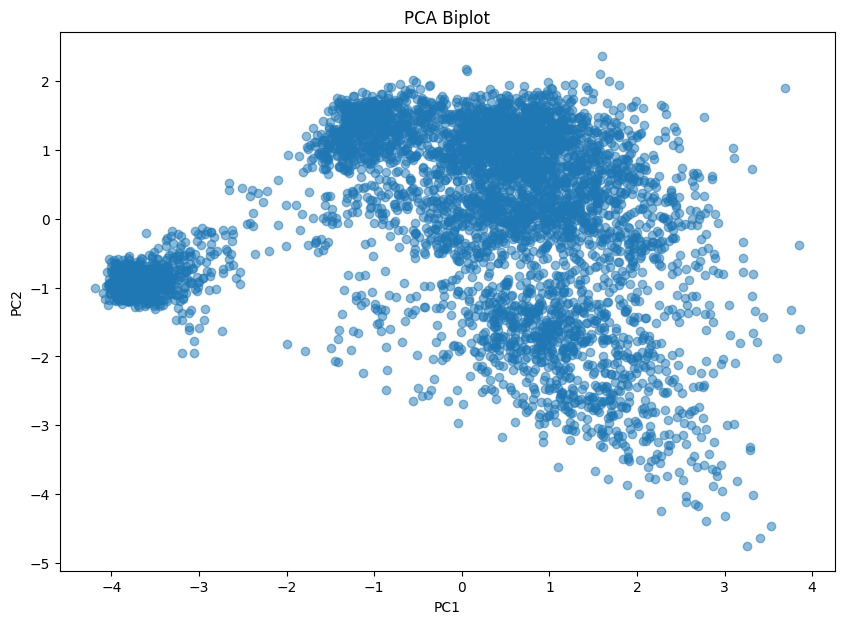

In [29]:
import matplotlib.pyplot as plt

# 1. Project the data onto the first 2 principal components
pc1 = 0
pc2 = 1
X_pca_2d = X_pca[:, [pc1, pc2]]

# 2. Set up the figure
plt.figure(figsize=(10, 7))

# 3. Scatter plot of the PCA-transformed data
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.xlabel(f'PC{pc1+1}')
plt.ylabel(f'PC{pc2+1}')
plt.title('PCA Biplot')

# 4. Plot the feature vectors (loadings)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0,               # start at origin
              pca.components_[pc1, i] * 3,  # scale arrows for visibility
              pca.components_[pc2, i] * 3,
              color='red', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[pc1, i] * 3.2,
             pca.components_[pc2, i] * 3.2,
             feature, color='green', ha='center', va='center')

plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.show()
